### ENTREGA DOS ARTEFATOS E ATIVIDADES: PARTE II – MACHINE LEARNING COM PYTHON

(COLAB GOOGLE) E JUPYTER NOTEBOOKS.

**02 – Construir um novo projeto de Machine Learning com os seguintes itens:**

Escolher um Dataset com o Kaggle Dataset.

Construir um código com python que implemente um Modelo de Machine Learning de **Classificação Binária**, escolha o algoritimo e faça o processo de Validação e Avaliação do Modelo de Machine Learning com Acurácia, precisão, F1 Score e Matriz de Confusão.

In [1]:
"""
    Dataset usado https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download
"""

'\n    Dataset usado https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download\n'

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('diabetes.csv', delimiter=',')

In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
normalizador = MinMaxScaler(feature_range=(0,1))

In [8]:
colunas_normalizar = data.columns

for colunas in colunas_normalizar:
    data[colunas] = normalizador.fit_transform(data[colunas].values.reshape(-1,1))

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x, y = data.drop('Outcome', axis=1), data['Outcome']

In [11]:
X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score

In [14]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [15]:
random_forest.fit(X_treino, y_treino)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = random_forest.predict(X_teste)

In [17]:
accuracy_score(y_teste, y_pred)

0.7532467532467533

In [18]:
precision_score(y_teste, y_pred)

0.6385542168674698

In [19]:
f1_score(y_teste, y_pred)

0.6503067484662577

In [22]:
import seaborn as sns

<Axes: >

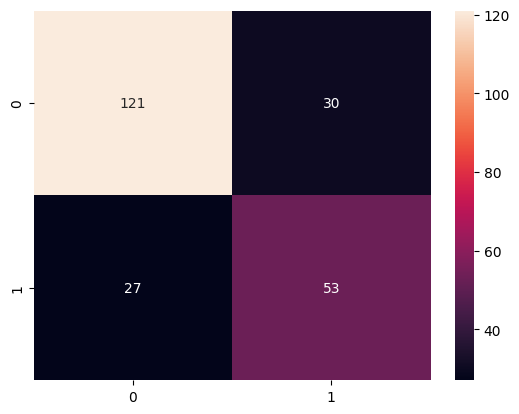

In [31]:
sns.heatmap(confusion_matrix(y_teste, y_pred), annot=True, fmt='d')

In [20]:
confusion_matrix(y_teste, y_pred)

array([[121,  30],
       [ 27,  53]])